In [1]:
# Problem Set #5
# Dennis Cruz dec2174
# Collaborators: Edward Sanchez, es2903

# Other Resources used:
# N-Body using RK4: https://prappleizer.github.io/Tutorials/RK4/RK4_Tutorial.html
# N-Body Simulation https://github.com/pmocz/nbody-python/blob/master/nbody.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import math as m
"""
%matplotlib inline
# Make displayed plots larger
plt.rcParams['figure.figsize'] = [18, 11]
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=16)
plt.rc('legend', fontsize = 12) """

"\n%matplotlib inline\n# Make displayed plots larger\nplt.rcParams['figure.figsize'] = [18, 11]\nplt.rc('axes', labelsize=13)\nplt.rc('axes', titlesize=16)\nplt.rc('legend', fontsize = 12) "

In [3]:
# Problem 1
# Write an N-body code for integratin solar system dynamics

# Using RK4:

def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    
    # Calculate Slopes
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)
    
    # Calculates new x, y and z
    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    
    return x, y, z


In [4]:
# Defining known values and constants:

# values in kg and m
mass_Earth   = 5.97219e24
mass_Sun     = 1.989e30
radius_Earth = 6.371e6 
radius_Sun   = 6.957e8
E_orbital_r  = 149.6e9
G            = 6.674e-11

def circular_orbit (G, m, r):
    
    # G is the gravitational constant
    # m is the mass of the more massive object
    # r is the orbital radius in meters
    
    Vc = np.sqrt(G * m / float(r))
    return Vc

In [5]:
# Obtaining Vcs for Earth and Sun (testing Circular Orbit)

Vc_Earth = circular_orbit(G, mass_Sun, E_orbital_r)
# Vc_Sun   = circular_orbit(G, mass_Sun,   E_orbital_r) just a test, it should start at 0

print (Vc_Earth)

29788.22982930735


In [6]:
# Obtaining acceleration through Direct Summation

def acceleration (body_1, body_2, m): #Earth is body_1, Sun is body_2
    
    # Getting magnitudes:
    mag_bodies = np.sqrt ((body_2[0] - body_1[0])**2 + (body_2[1] - body_1[0])**2)
    
    # Acceleration formula:
    acc_sum = (G * m * (body_2 - body_1)) / float((mag_bodies)**3) 
    
    return acc_sum

In [7]:
# Test of acceleration function:

#j = 2
#for i in range(1, 5):
 #   for j in range(2,6):
  #      pos_Sun[0], pos_Sun[1] = j, j
   #     pos_Earth[0], pos_Earth[1] = i, i
    #    print (pos_Sun, pos_Earth)
     #   if i != j:
      #      print (acceleration(pos_Earth, pos_Sun, mass_Sun))
        
# Error occurs because of division by 0

In [8]:
# Defining ODEs:

def dxdt (t, x, v):                          # returns position
    return v 

def dvdt (t, x, v):                          # returns velocity
    return acceleration (body_1, body_2, m)                                 

In [9]:
# Initial Conditions:

# Time of integration:
t0 = 0
dt = 1000
t_end = 5.77e8 # 5 orbital periods, 5 years in secods 

# Initial Positions:

array_pos = np.zeros((2,2))

array_pos [0, 0] = E_orbital_r    # distance from Sun to Earth
pos_Earth = array_pos[0]
pos_Sun = array_pos[1]

# Initial Velocities:

array_vel = np.zeros((2,2))
array_vel [0,1] = (circular_orbit(G, mass_Sun, E_orbital_r)) # velocity in x = 0; y = circular orbit
vel_Earth = array_vel[0]
vel_Sun = array_vel[1]

# Initial accelerations from acceleration function



In [10]:
# Running RK4 for both position and velocity

time_li      = [t0]
Earth_pos_li = [pos_Earth]
Earth_vel_li = [vel_Earth]

Sun_pos_li = [pos_Sun]
Sun_vel_li = [vel_Sun]


t = t0
v = array_vel
x = array_pos

body_1 = pos_Earth
body_2 = pos_Sun
m = mass_Sun

while t <= t_end:
    
    t, x, v = RungeKuttaCoupled(t, x, v, dt, dxdt, dvdt)
    Earth_pos_li.append(x[0])
    Earth_vel_li.append(v[0])
    Sun_pos_li.append(x[1])
    Sun_vel_li.append(v[1])
    time_li.append(t)
    
    
    
   # print (t,'\n', v, '\n', x,'\n','\n', dvdt(t,v,x))


In [11]:
# Plotting x and y positions over time

def Position_plot (pos_body1, pos_body2, pos_body_3):
    plt.title("Earth and Sun position")
    plt.plot(pos_body1, label="Earth Position", color="blue")
    plt.plot(pos_body2, label="Sun Position", color="green")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(loc="best")
    plt.show()
    return

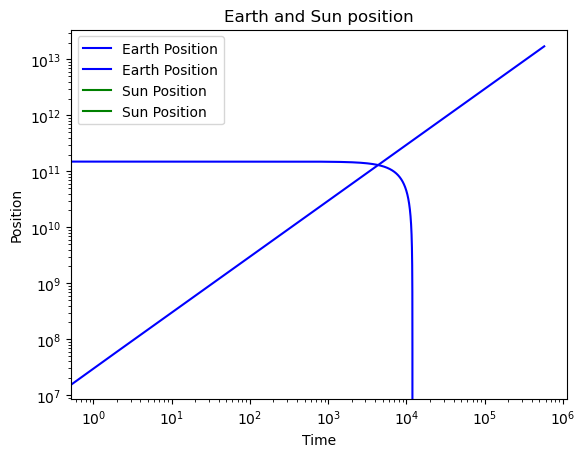

In [12]:
Position_plot (Earth_pos_li, Sun_pos_li, 0)

In [13]:
# Satellite orbit changes:
Earth_pos_li[0:100]

[array([1.496e+11, 0.000e+00]),
 array([1.49599999e+11, 2.97882298e+07]),
 array([1.49599996e+11, 5.95764597e+07]),
 array([1.49599991e+11, 8.93646895e+07]),
 array([1.49599983e+11, 1.19152919e+08]),
 array([1.49599974e+11, 1.48941149e+08]),
 array([1.49599962e+11, 1.78729379e+08]),
 array([1.49599949e+11, 2.08517609e+08]),
 array([1.49599933e+11, 2.38305839e+08]),
 array([1.49599915e+11, 2.68094068e+08]),
 array([1.49599895e+11, 2.97882298e+08]),
 array([1.49599873e+11, 3.27670528e+08]),
 array([1.49599849e+11, 3.57458758e+08]),
 array([1.49599823e+11, 3.87246988e+08]),
 array([1.49599794e+11, 4.17035218e+08]),
 array([1.49599764e+11, 4.46823447e+08]),
 array([1.49599732e+11, 4.76611677e+08]),
 array([1.49599697e+11, 5.06399907e+08]),
 array([1.49599660e+11, 5.36188137e+08]),
 array([1.49599621e+11, 5.65976367e+08]),
 array([1.49599581e+11, 5.95764597e+08]),
 array([1.49599538e+11, 6.25552826e+08]),
 array([1.49599493e+11, 6.55341056e+08]),
 array([1.49599445e+11, 6.85129286e+08]),
 a

Im not sure how to implement a condition in which position x also changes. Also, how to change the aceleration at each position using different masses.

In [14]:
# Problem 2:

# Getting orbit for Jupiter:

def elliptical_velocity (G, a, m, e):
    # V_tan = orbital velocity
    # a = lenght of semimajor axis in meters
    # e = eccentricity
    # m = the mass of the more massive body
    
    V_tan = np.sqrt((G*m*(1+e))/(a*(1-e)))
    
    return V_tan
def orbital_r(e, a):
    r = (1-e)*a
    return r

In [15]:
# Getting orbit:

# a = 5.984e11 (4 A.U)
# e = 0.6
Vc_Jupiter = elliptical_velocity(G, 5.984e11, mass_Sun, 0.6)
print (Vc_Jupiter)

29788.229829307355


Same velocity as Earth velocity when it is tangential?

In [16]:
# Initial Conditions:

a = 5.984e11 #(4 A.U)
e = 0.6

J_orbital_r = orbital_r(e, a)

# Time of integration:
t0 = 0
dt = 100000
t_end = 5.77e10 # 100 orbital periods, 100 years in seconds 

# Initial Positions:

array_pos = np.zeros((3,2))

array_pos [0, 0] = E_orbital_r    # distance from Sun to Earth
array_pos [2, 0] = J_orbital_r    # Distance from Jupiter to Sun
pos_Earth        = array_pos[0]
pos_Sun          = array_pos[1]
pos_Jupiter      = array_pos[2]

# Initial Velocities:

array_vel       = np.zeros((3,2))
array_vel [0,1] = circular_orbit(G, mass_Sun, E_orbital_r) # velocity in x = 0; y = circular orbit
array_vel [2,1] = elliptical_velocity (G, a, mass_Sun, e)
vel_Earth       = array_vel[0]
vel_Sun         = array_vel[1]
vel_Jup         = array_vel[2]

# Initial accelerations from acceleration function


In [17]:
# Running RK4 for both 3-body

time_li      = [t0]
Earth_pos_li = [pos_Earth]
Earth_vel_li = [vel_Earth]

Sun_pos_li = [pos_Sun]
Sun_vel_li = [vel_Sun]

Jup_pos_li = [pos_Jupiter]
Jup_vel_li = [vel_Jup]

t = t0
v = array_vel
x = array_pos

body_1 = pos_Jupiter
body_2 = pos_Sun
m      = mass_Sun

while t <= t_end:
    
    t, x, v = RungeKuttaCoupled(t, x, v, dt, dxdt, dvdt)
    
    Earth_pos_li.append(x[0])
    Earth_vel_li.append(v[0])
    
    Sun_pos_li.append(x[1])
    Sun_vel_li.append(v[1])
    
    Jup_pos_li.append(x[2])
    Jup_vel_li.append(v[2])
    
    time_li.append(t)
    
    
   # print (t,'\n', v, '\n', x,'\n','\n', dvdt(t,v,x))


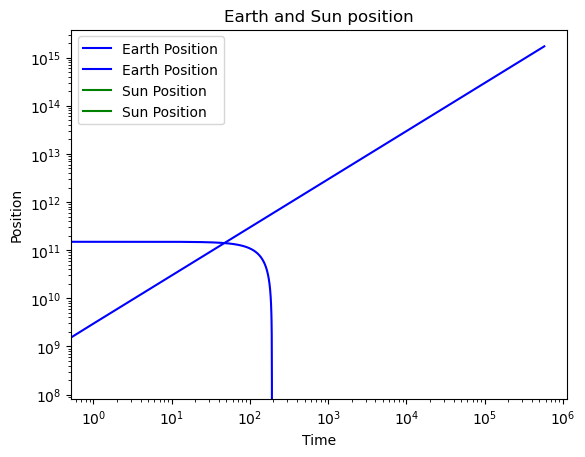

In [18]:
Position_plot(Earth_pos_li, Sun_pos_li, Jup_pos_li)